## Eksplorasi data (EDA)

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### 1. Cek struktur data

In [243]:
train = pd.read_csv("data_train.csv")
train.head()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan,konsumsi_listrik
0,0,2021-09-17 00:00:00,15.9,-17.1,571.910,1003.0,A,216.0
1,1,2021-09-17 01:00:00,15.5,-19.3,575.040,996.0,A,210.0
2,2,2021-09-17 02:00:00,15.1,-20.0,578.435,1000.0,A,225.0
3,3,2021-09-17 03:00:00,15.9,-17.1,582.580,995.0,A,216.0
4,4,2021-09-17 04:00:00,15.9,-19.3,586.600,1005.0,A,222.0


In [244]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 24336 non-null  int64  
 1   tanggal_waktu      24336 non-null  object 
 2   suhu               24336 non-null  float64
 3   beban_listrik      24336 non-null  float64
 4   kecepatan_angin    24336 non-null  float64
 5   tekanan_udara      24336 non-null  float64
 6   dampak_lingkungan  24336 non-null  object 
 7   konsumsi_listrik   24283 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.5+ MB


In [245]:
train.describe()

,ID,suhu,beban_listrik,kecepatan_angin,tekanan_udara,konsumsi_listrik
count,24336.000000,24336.000000,24336.000000,24336.000000,24336.000000,24283.000000
mean,16027.381657,25.161082,-1.783510,23.631823,986.012964,532.445209
std,9299.957517,4.888658,10.521302,46.781818,12.130831,4826.021227
min,0.000000,12.700000,-32.900000,1.075000,953.000000,174.000000
25%,8051.750000,21.100000,-10.700000,3.165000,977.000000,219.000000
50%,16079.500000,25.800000,-1.400000,6.670000,986.000000,270.000000
75%,24155.250000,29.400000,7.900000,22.700000,995.000000,342.000000
max,32183.000000,35.300000,18.600000,586.600000,1024.000000,99999.000000


### 2. Cek missing values dan outlier

In [246]:
train.isnull().sum()

ID                    0
tanggal_waktu         0
suhu                  0
beban_listrik         0
kecepatan_angin       0
tekanan_udara         0
dampak_lingkungan     0
konsumsi_listrik     53
dtype: int64

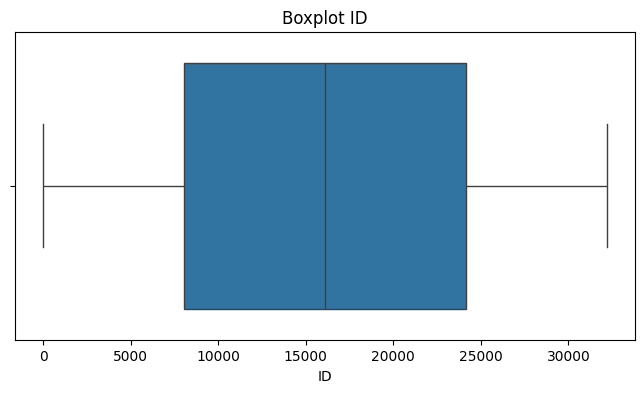

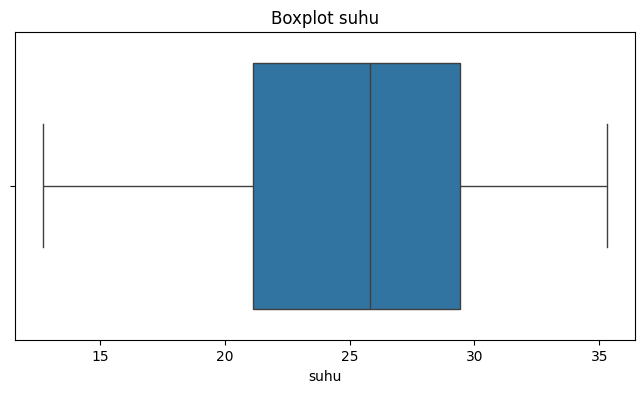

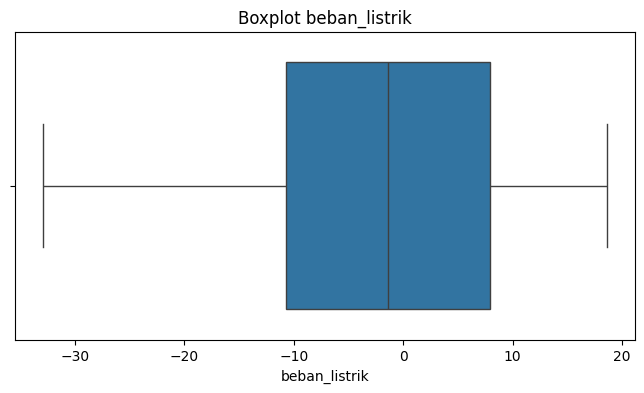

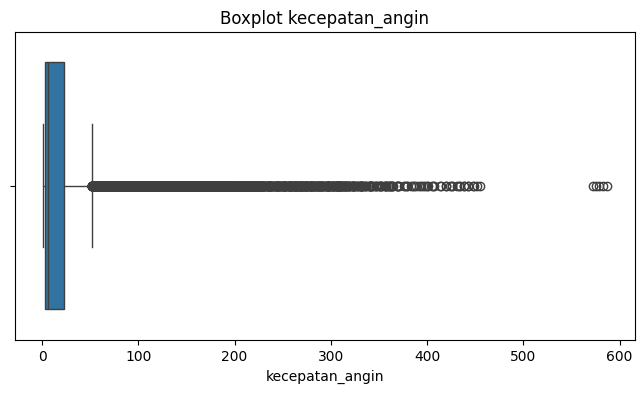

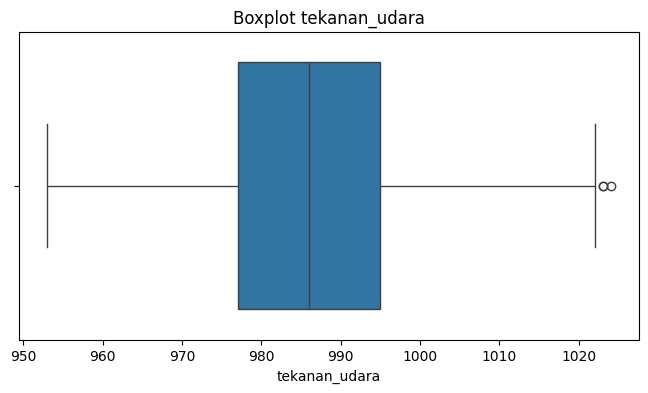

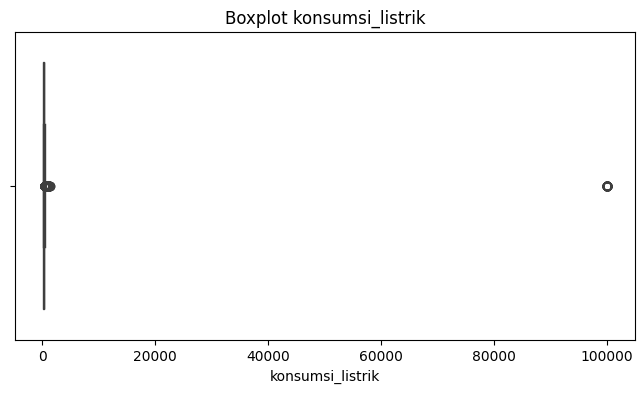

In [247]:
num_cols = train.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot {col}')
    plt.show()

### 3. Visualisasi distribusi data

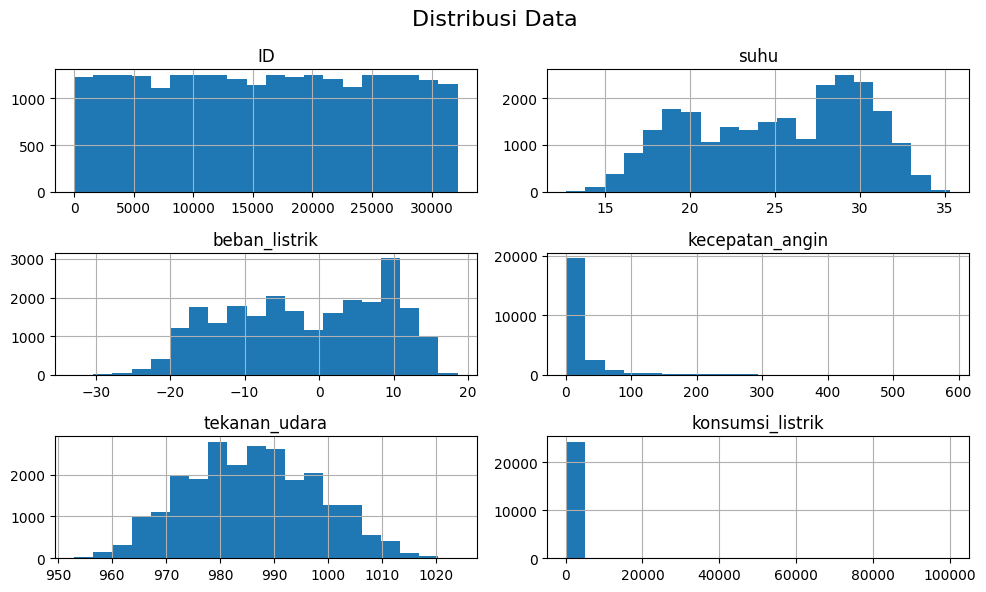

In [248]:
train.hist(figsize=(10, 6), bins=20)
plt.suptitle("Distribusi Data", fontsize=16)
plt.tight_layout()
plt.show()

### 4. Mengubah kolom waktu

In [249]:
train['tanggal_waktu'] = pd.to_datetime(train['tanggal_waktu'])
train['jam'] = train['tanggal_waktu'].dt.hour
train['hari'] = train['tanggal_waktu'].dt.day
train['bulan'] = train['tanggal_waktu'].dt.month
train['tahun'] = train['tanggal_waktu'].dt.year
train.head()


,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan,konsumsi_listrik,jam,hari,bulan,tahun
0,0,2021-09-17 00:00:00,15.9,-17.1,571.910,1003.0,A,216.0,0,17,9,2021
1,1,2021-09-17 01:00:00,15.5,-19.3,575.040,996.0,A,210.0,1,17,9,2021
2,2,2021-09-17 02:00:00,15.1,-20.0,578.435,1000.0,A,225.0,2,17,9,2021
3,3,2021-09-17 03:00:00,15.9,-17.1,582.580,995.0,A,216.0,3,17,9,2021
4,4,2021-09-17 04:00:00,15.9,-19.3,586.600,1005.0,A,222.0,4,17,9,2021


## Data Preparation

### 1. Mengatasi missing value

In [250]:
train = train.dropna(subset=['konsumsi_listrik'])
train.isnull().sum()


ID                   0
tanggal_waktu        0
suhu                 0
beban_listrik        0
kecepatan_angin      0
tekanan_udara        0
dampak_lingkungan    0
konsumsi_listrik     0
jam                  0
hari                 0
bulan                0
tahun                0
dtype: int64

### 2. Encoding Kategori

In [252]:
le = LabelEncoder()
train['dampak_lingkungan'] = le.fit_transform(train['dampak_lingkungan'])
train.head()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan,konsumsi_listrik,jam,hari,bulan,tahun
0,0,2021-09-17 00:00:00,15.9,-17.1,571.910,1003.0,0,216.0,0,17,9,2021
1,1,2021-09-17 01:00:00,15.5,-19.3,575.040,996.0,0,210.0,1,17,9,2021
2,2,2021-09-17 02:00:00,15.1,-20.0,578.435,1000.0,0,225.0,2,17,9,2021
3,3,2021-09-17 03:00:00,15.9,-17.1,582.580,995.0,0,216.0,3,17,9,2021
4,4,2021-09-17 04:00:00,15.9,-19.3,586.600,1005.0,0,222.0,4,17,9,2021


In [254]:
train['tanggal_waktu'] = train['tanggal_waktu'].dt.to_period('6M').astype(str)


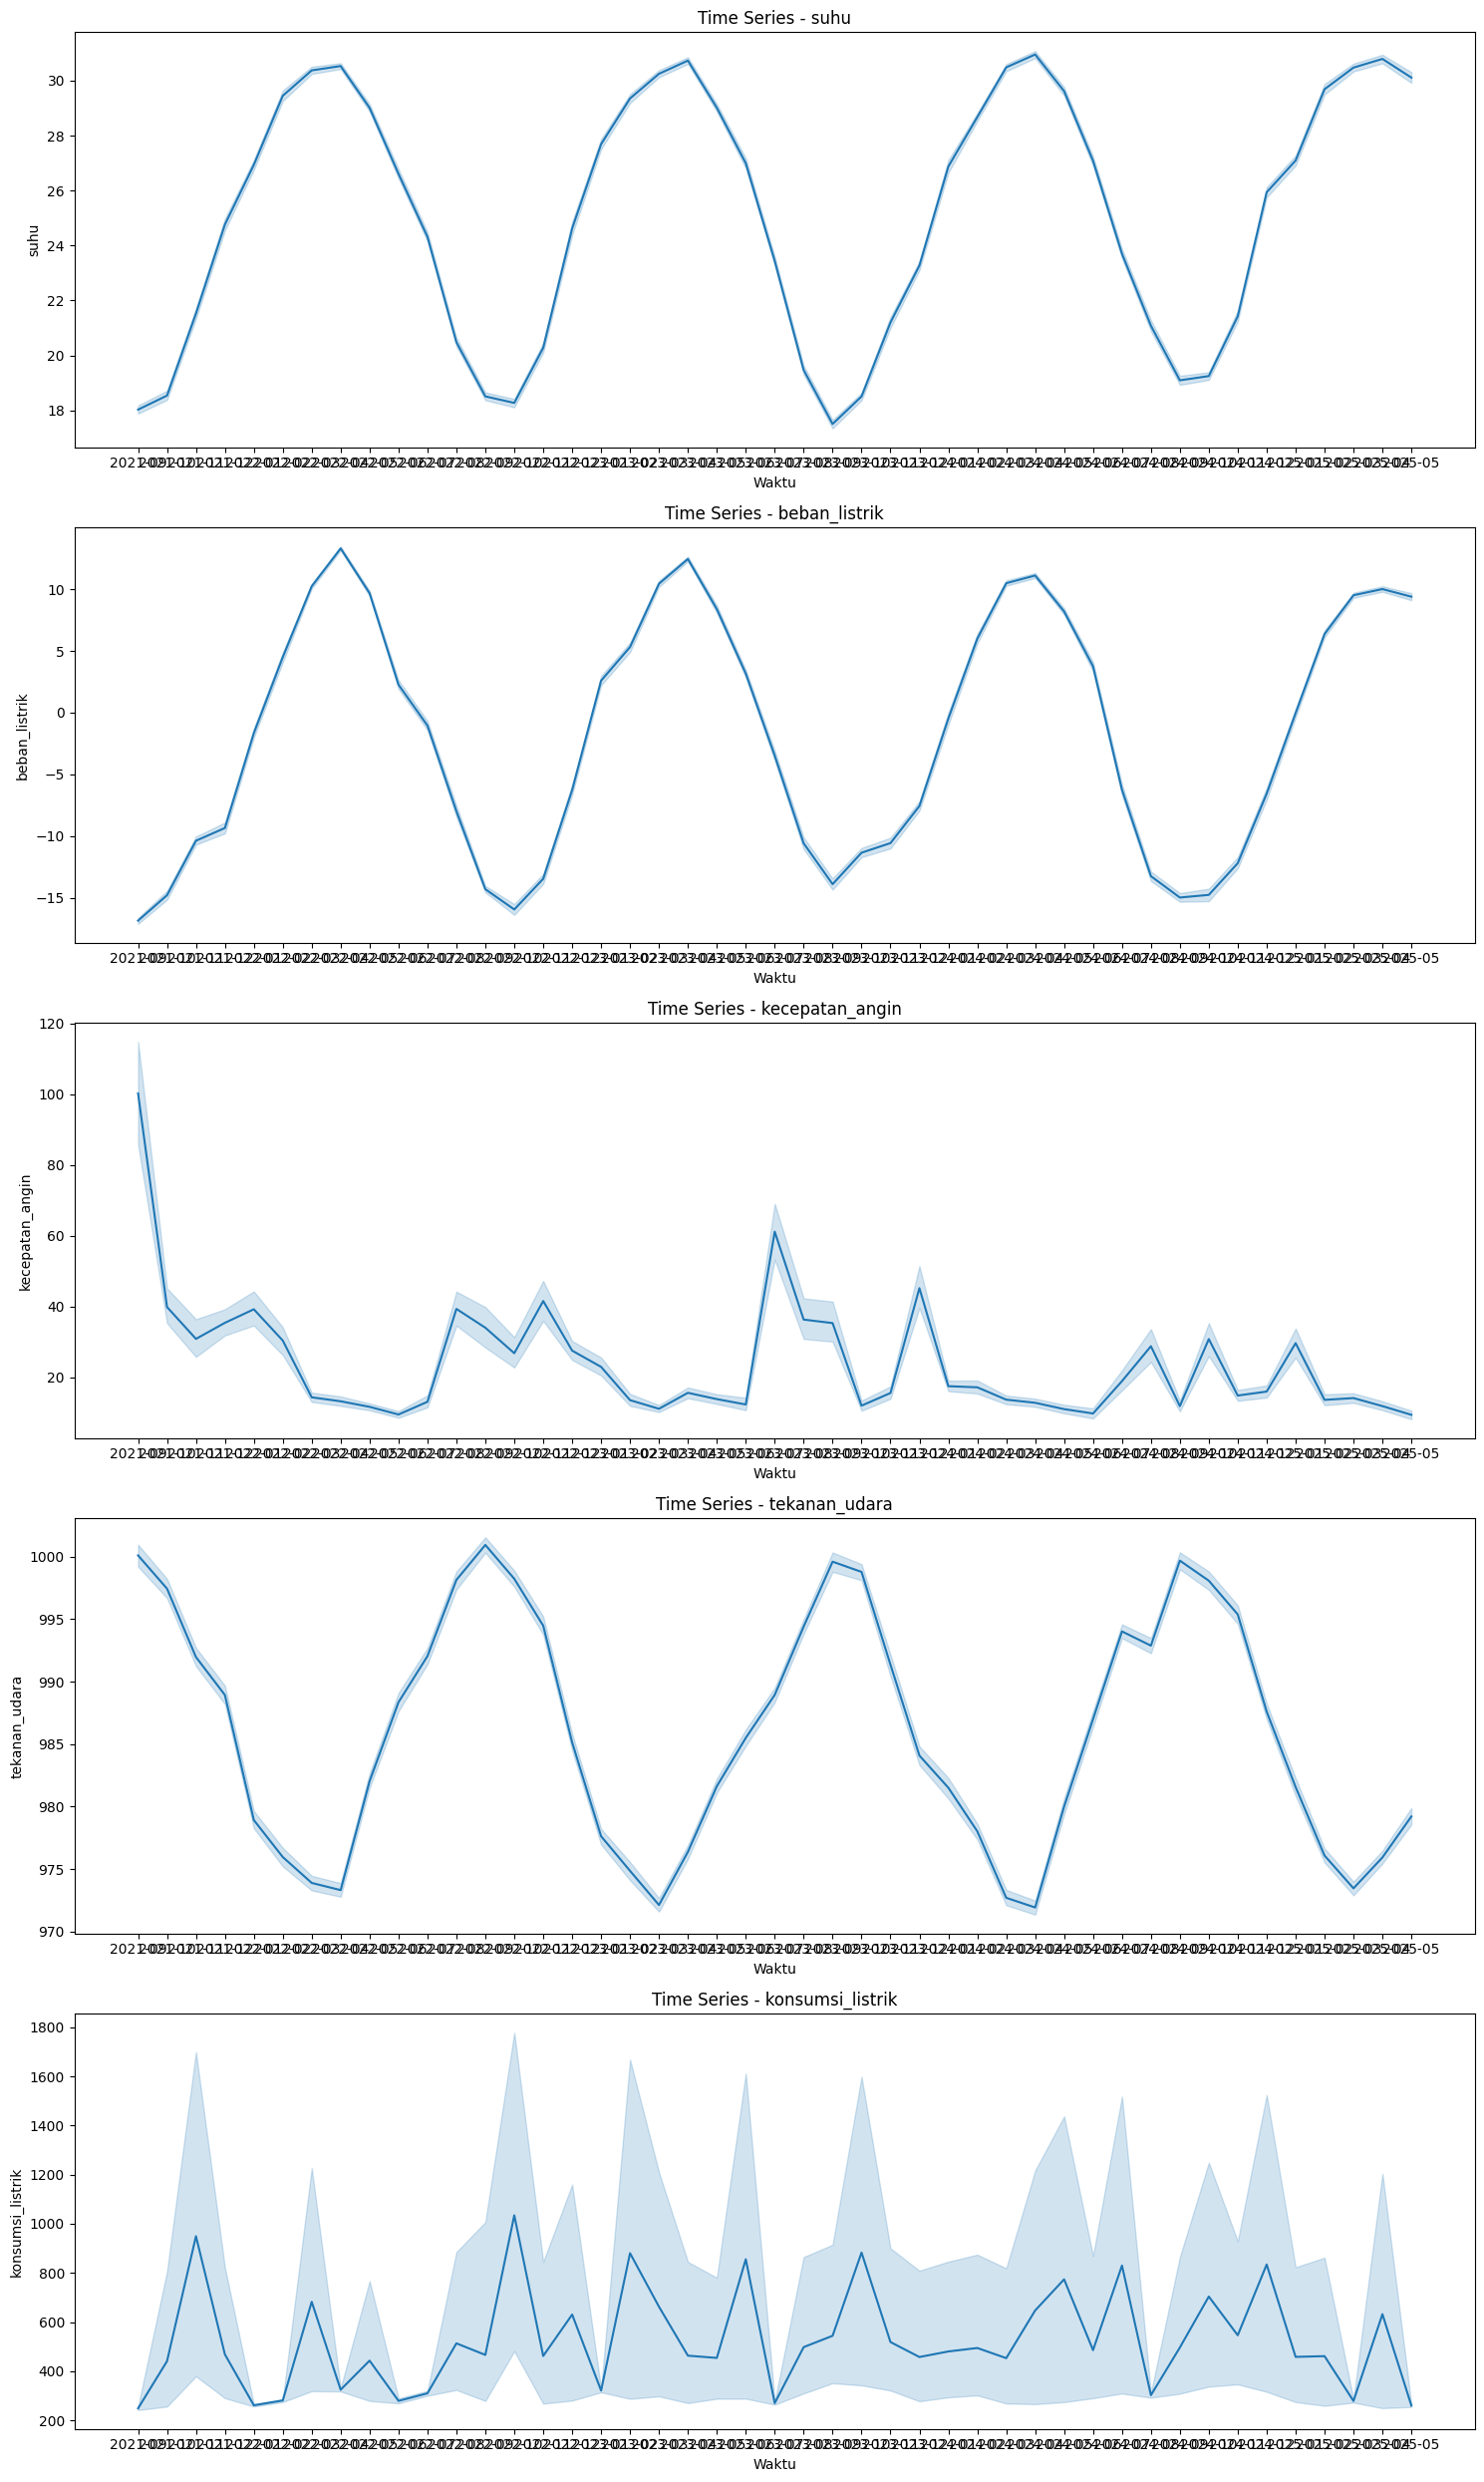

In [264]:
num_cols = ['suhu', 'beban_listrik', 'kecepatan_angin', 'tekanan_udara', 'konsumsi_listrik']
plt.figure(figsize=(15, 25))
for i, kolom in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.lineplot(data=train, x='tanggal_waktu', y=kolom)
    plt.title(f'Time Series - {kolom}', fontsize=12)
    plt.xlabel('Waktu')
    plt.ylabel(kolom)
    plt.tight_layout()

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize= (25,5))
ax.plot(train.index, train["Precipitation"], label ="Precipitation")
ax.plot(train.index, train["Relative Humidity"], label ="Humidity")
ax.plot(train.index, train["Temperature"], label ="Temperature")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Trends of Precipitation, Humidity, and Temperature Over Time")
plt.legend()
plt.show()

In [ ]:
num_cols = train.select_dtypes(include='number').columns

plt.figure(figsize=(14, 6))
for col in num_cols:
    plt.title('Time Series Semua Variabel Numerik')
    plt.xlabel('Tanggal Waktu')
    plt.ylabel('Nilai')
    plt.legend()
    plt.tight_layout()
    plt.show()

KeyError: 'tanggal_waktu'

<Figure size 1400x600 with 0 Axes>

In [ ]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.plot(df['date'], df_date[col], marker='o', label=col)
    plt.figure(figsize=(12, 5))
    plt.plot(df['date'], df[col], marker='o')
    plt.title('Visualisasi Data Time Series')
    plt.xlabel('Tahun')
    plt.ylabel('Beban Listrik')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

KeyError: 'suhu'